# Top-5 Semantic Accuracy:

Accuracy is defined as percentage of items for which the 'synonyms' or 'similar to' of ground truth word (by NLTK) is among the model's top k predictions, with k = 5.

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Metaphors from Human-Designed Questions dataset (Zero-shot)

In [ ]:
import pandas as pd

df = pd.read_csv('HumanQue_result.csv')

In [ ]:
from nltk.corpus import wordnet as wn
import ast

def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['Top-k Predicted Tokens'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
df[:10]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_HumanQue_results.csv', index=False)

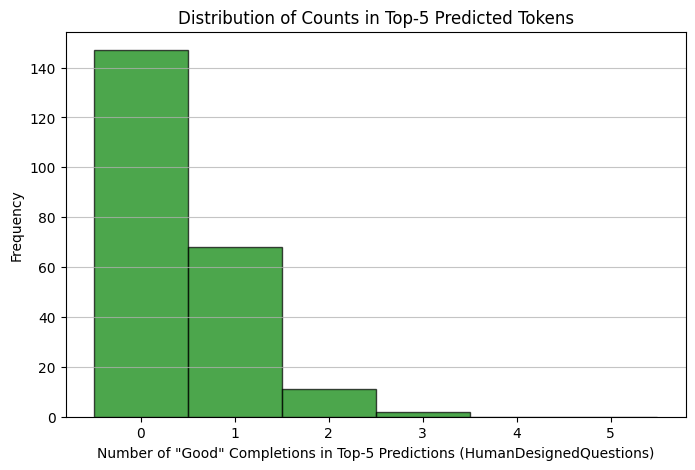

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (HumanDesignedQuestions)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()



In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

0    147
1     68
2     11
3      2
Name: Top-5 Predictions Accuracy, dtype: int64


#### Metaphors from Human-Designed Questions dataset (Fine-tuning)

In [ ]:
df = pd.read_csv('Transformed_HumanQue_unmasker_results.csv')

In [ ]:
def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['token_str'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
#df[:10]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_HumanQue_unmasker_results.csv', index=False)

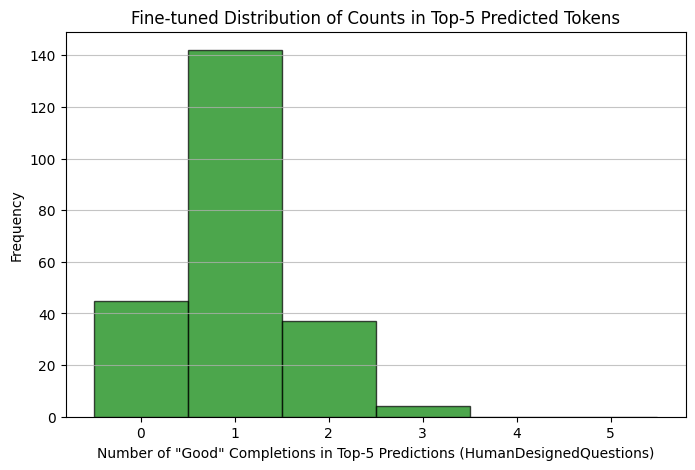

In [ ]:
# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Fine-tuned Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (HumanDesignedQuestions)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

1    142
0     45
2     37
3      4
Name: Top-5 Predictions Accuracy, dtype: int64


### Metaphors from General Corpus dataset (Zero-shot)

In [ ]:
df = pd.read_csv('GeneralCorpus_result.csv')

In [ ]:
def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['Top-k Predicted Tokens'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
df[:5]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_Corpus_results.csv', index=False)

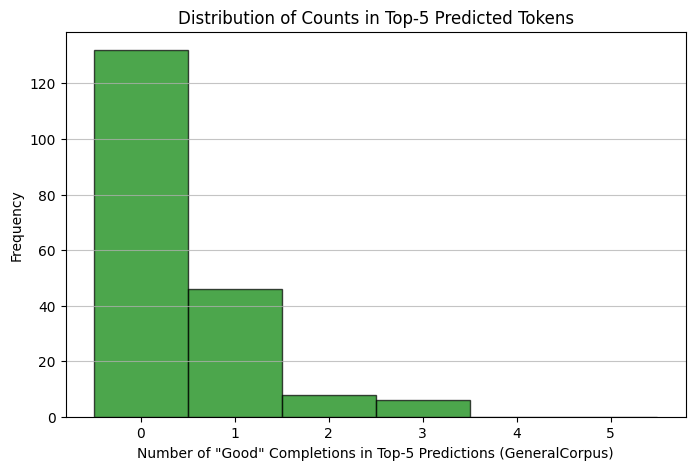

In [ ]:
# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (GeneralCorpus)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

0    132
1     46
2      8
3      6
Name: Top-5 Predictions Accuracy, dtype: int64


### Metaphors from General Corpus dataset (Fine-tuning)

In [ ]:
try:
    df = pd.read_csv('Transformed_Corpus_unmasker_results.csv')
except UnicodeDecodeError:
    df = pd.read_csv('Transformed_Corpus_unmasker_results.csv', encoding='ISO-8859-1')  # or try 'cp1252'

df.head()


In [ ]:
def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['token_str'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
df[:5]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_Corpus_unmasker_results.csv', index=False)


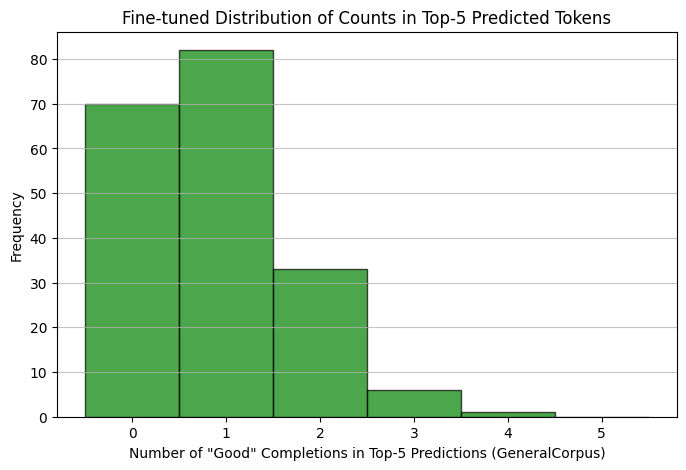

In [ ]:
# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Fine-tuned Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (GeneralCorpus)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

1    82
0    70
2    33
3     6
4     1
Name: Top-5 Predictions Accuracy, dtype: int64


### Non-metaphor (Zero-shot)


In [ ]:
df = pd.read_csv('nonMetaphor_result.csv')
df[:5]

In [ ]:
def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['Top-k Predicted Tokens'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
df[:5]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_nonMetaphor_results.csv', index=False)


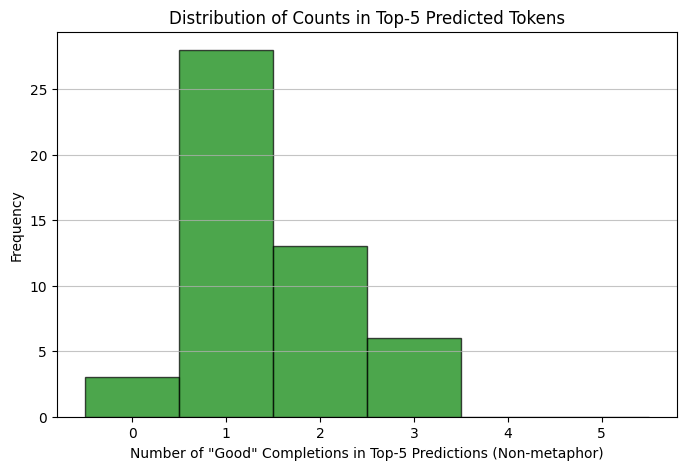

In [ ]:
# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (Non-metaphor)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

1    28
2    13
3     6
0     3
Name: Top-5 Predictions Accuracy, dtype: int64


### Non-metaphor (Fine-tuning)

In [ ]:
try:
    df = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv')
except UnicodeDecodeError:
    df = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv', encoding='ISO-8859-1')  # or try 'cp1252'

df.head()

In [ ]:
def count_good_predictions_in_top_5(df):
    good_predictions_counts = []
    ground_truth_synsets = []
    ground_truth_similar_tos = []

    for _, row in df.iterrows():
        expected = row['expected']
        # Correctly parse the 'Top-k Predicted Tokens' string as a list
        '''The format of the 'Top-k Predicted Tokens' column indicates that the predicted tokens are stored as a string representation of a list.
        To properly extract these tokens, need to first evaluate the string as a list and then process each token.'''
        try:
            top_5_predictions = ast.literal_eval(row['token_str'])
        except ValueError:
            # Handle potential parsing error
            print(f"Error parsing row: {row}")
            top_5_predictions = []

        top_5_predictions = [pred.strip().lower() for pred in top_5_predictions]

        # Get synsets and similar to synsets of the ground truth word
        synsets = wn.synsets(expected, pos=wn.ADJ)
        similar_to_synsets = [sim_syn for syn in synsets for sim_syn in syn.similar_tos()]
        combined_lemmas = {lemma.name().replace('_', ' ').lower() for syn in synsets + similar_to_synsets for lemma in syn.lemmas()}

        # Count how many of the top-5 predictions are in the combined set of synsets and similar to
        good_prediction_count = sum(pred.lower() in combined_lemmas for pred in top_5_predictions)
        good_predictions_counts.append(good_prediction_count)

        # Append the synsets and similar to as strings
        synset_names = ', '.join(syn.lemma_names()[0].replace('_', ' ') for syn in synsets)
        similar_to_names = ', '.join(sim_syn.lemma_names()[0].replace('_', ' ') for sim_syn in similar_to_synsets)
        ground_truth_synsets.append(synset_names)
        ground_truth_similar_tos.append(similar_to_names)

    return good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos

# Calculate the good prediction counts (number of matches), synsets, and similar to synsets
good_predictions_counts, ground_truth_synsets, ground_truth_similar_tos = count_good_predictions_in_top_5(df)

# Append the results to the DataFrame
df['Top-5 Predictions Accuracy'] = good_predictions_counts
df['Ground Truth Synsets'] = ground_truth_synsets
df['Ground Truth Similar Tos'] = ground_truth_similar_tos
df[:5]

In [ ]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Eval_nonMetaphor_unmasker_results.csv', index=False)


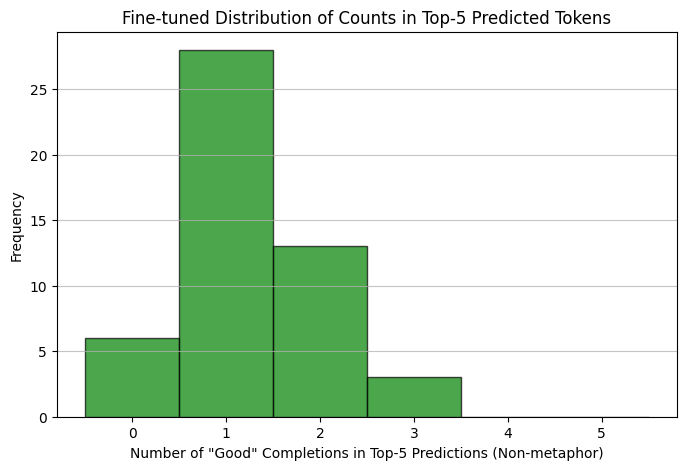

In [ ]:
# Visualize the 'Top-5 Predictions Accuracy' data
plt.figure(figsize=(8, 5))
plt.hist(df['Top-5 Predictions Accuracy'], bins=np.arange(-0.5, 6.5, 1), alpha=0.7, color='green', edgecolor='black')
plt.title('Fine-tuned Distribution of Counts in Top-5 Predicted Tokens')
plt.xlabel('Number of "Good" Completions in Top-5 Predictions (Non-metaphor)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 6, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
counts = df['Top-5 Predictions Accuracy'].value_counts()

# Display the counts
print(counts)

1    28
2    13
0     6
3     3
Name: Top-5 Predictions Accuracy, dtype: int64


# Top-10 most Frequent Words

### Zero-shot

In [ ]:
import pandas as pd
from ast import literal_eval
from collections import Counter

# Load the CSV file
file_path = 'Eval_HumanQue_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['Top-k Predicted Tokens'] = data['Top-k Predicted Tokens'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['Top-k Predicted Tokens'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['Top-k Predicted Tokens'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)


In [ ]:
# Load the CSV file
file_path = 'Eval_Corpus_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['Top-k Predicted Tokens'] = data['Top-k Predicted Tokens'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['Top-k Predicted Tokens'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['Top-k Predicted Tokens'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)

In [ ]:
# Load the CSV file
file_path = 'Eval_nonMetaphor_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['Top-k Predicted Tokens'] = data['Top-k Predicted Tokens'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['Top-k Predicted Tokens'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['Top-k Predicted Tokens'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)

### Fine-tuning


In [ ]:
# Load the CSV file
file_path = 'Eval_HumanQue_unmasker_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['token_str'] = data['token_str'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['token_str'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['token_str'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)

In [ ]:
# Load the CSV file
file_path = 'Eval_Corpus_unmasker_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['token_str'] = data['token_str'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['token_str'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['token_str'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)

In [ ]:
# Load the CSV file
file_path = 'Eval_nonMetaphor_unmasker_results.csv'
data = pd.read_csv(file_path)

# Convert string representation of list to actual list
data['token_str'] = data['token_str'].apply(literal_eval)

# Filter rows where expected word is not in Top-k Predicted Tokens
filtered_data = data[~data.apply(lambda row: row['expected'] in row['token_str'], axis=1)]

# Flatten the list of Top-k Predicted Tokens and count frequencies
all_predicted_tokens = [token for sublist in filtered_data['token_str'] for token in sublist]
token_counts = Counter(all_predicted_tokens)

# Get the top 10 most frequent words
top_10_frequent_words = token_counts.most_common(10)

# Print the top 10 most frequent words
print(top_10_frequent_words)